In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("fitness_data.csv")
df.head()

,date,activity_level,steps,calories_burned,sleep_hours,stress_score,resting_hr,day_of_week
0,2024-01-01,Moderate,7921,420,7.9,50,60.9,Monday
1,2024-01-02,High,10848,513,6.4,47,60.1,Tuesday
2,2024-01-03,Moderate,7218,316,6.8,58,64.5,Wednesday
3,2024-01-04,Moderate,8057,401,7.3,34,60.7,Thursday
4,2024-01-05,Low,2380,121,6.8,39,57.6,Friday


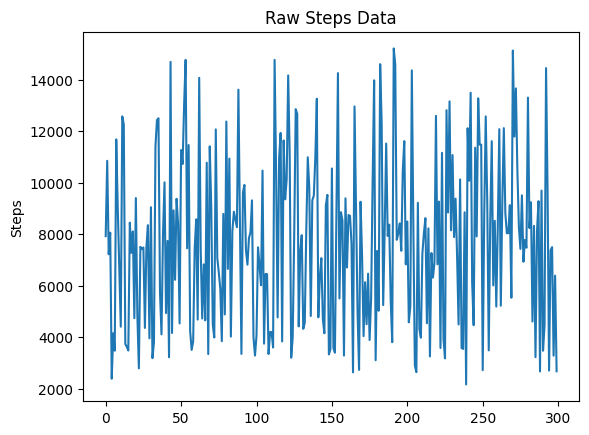

In [3]:
plt.plot(df["steps"])
plt.title("Raw Steps Data")
plt.ylabel("Steps")
plt.show()

NameError: name 'plot' is not defined

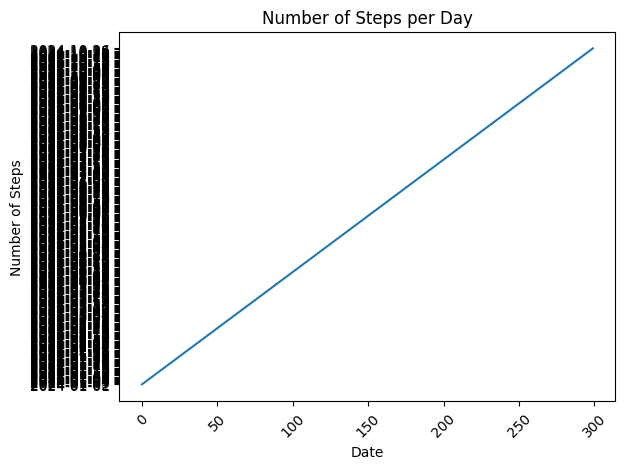

In [ ]:
plt.plot(df["date"]), df["steps"]
plt.title("Number of Steps per Day")
plt.xlabel("Date")
plt.ylabel("Number of Steps")
plt.xticks(rotation=45)
plot.show()

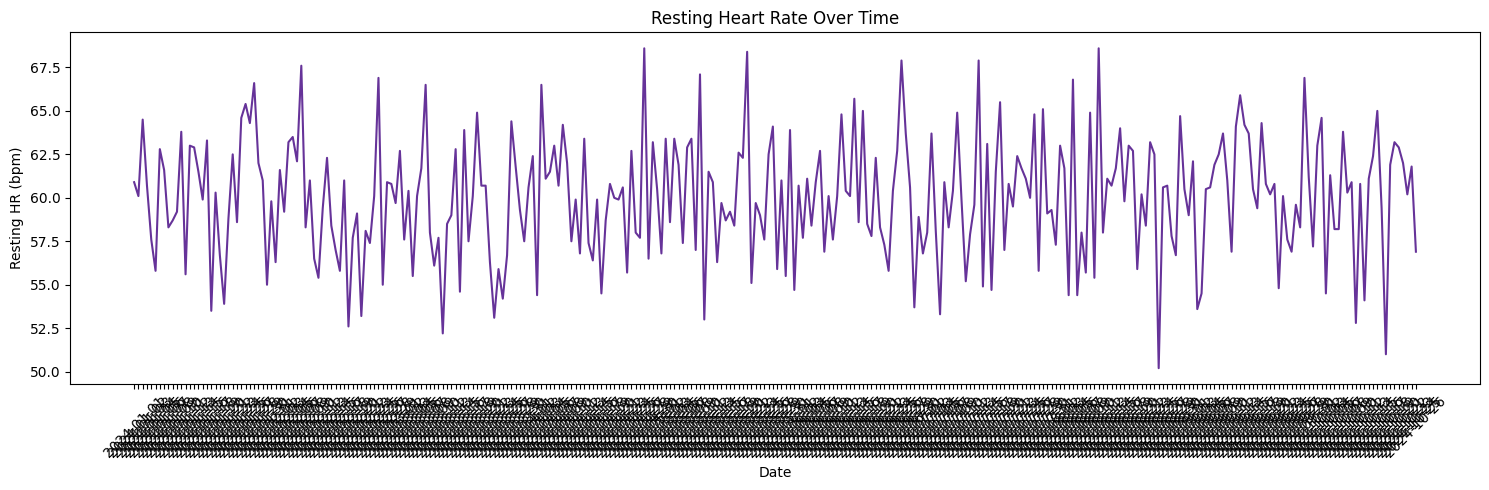

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df["date"], df["resting_hr"], color="rebeccapurple")
plt.title("Resting Heart Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Resting HR (bpm)")
plt.xticks(rotation=45)
plt.tight_layout()

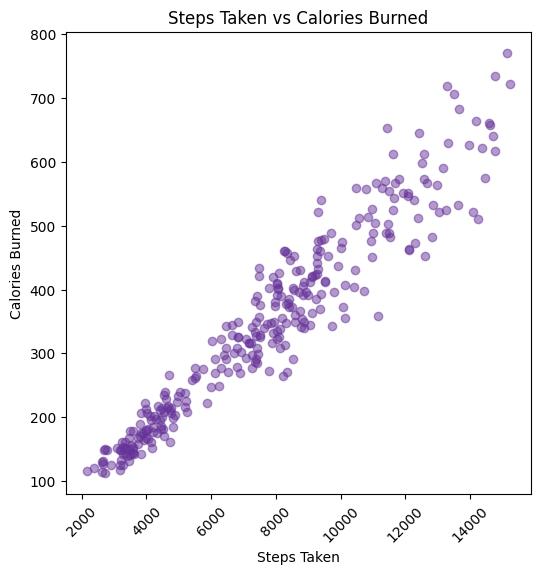

In [29]:
#relationship between # of steps taken and # of calories burned in a day
plt.figure(figsize=(6,6))
plt.scatter(df["steps"], df["calories_burned"], color="rebeccapurple", alpha=0.5)
plt.title("Steps Taken vs Calories Burned")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.show()

In [30]:
df.head()

,date,activity_level,steps,calories_burned,sleep_hours,stress_score,resting_hr,day_of_week
0,2024-01-01,Moderate,7921,420,7.9,50,60.9,Monday
1,2024-01-02,High,10848,513,6.4,47,60.1,Tuesday
2,2024-01-03,Moderate,7218,316,6.8,58,64.5,Wednesday
3,2024-01-04,Moderate,8057,401,7.3,34,60.7,Thursday
4,2024-01-05,Low,2380,121,6.8,39,57.6,Friday


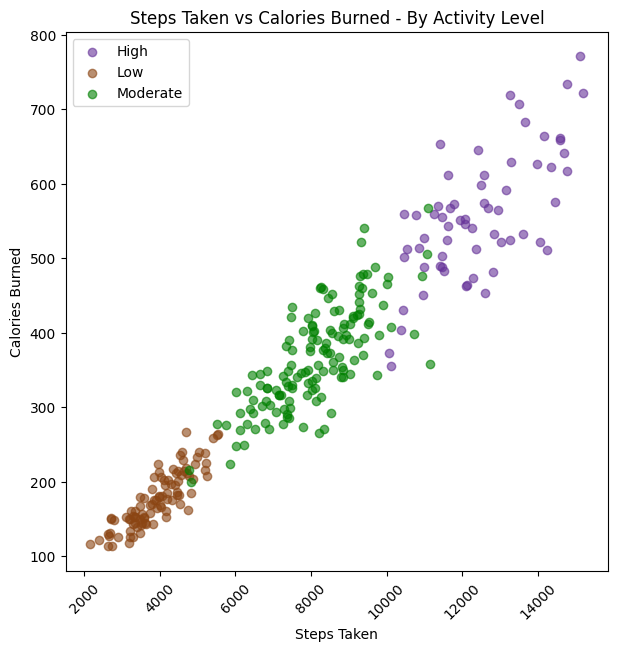

In [ ]:
plt.figure(figsize=(7,7))
colors = {"Low": "saddlebrown", "Moderate": "green", "High": "rebeccapurple"}

for level, subset in df.groupby("activity_level"):
    plt.scatter(subset["steps"], subset["calories_burned"],
                label = level, color=colors[level], alpha=0.6
                )
    
plt.title("Steps Taken vs Calories Burned - By Activity Level")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.legend()
plt.show()

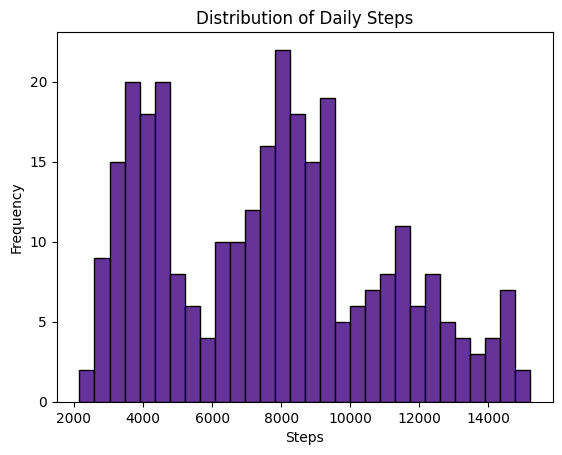

In [56]:
plt.hist(df["steps"], bins = 30, color = "rebeccapurple", edgecolor = "black")
plt.title("Distribution of Daily Steps")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Resting Heart Rate (bpm) Distribution')

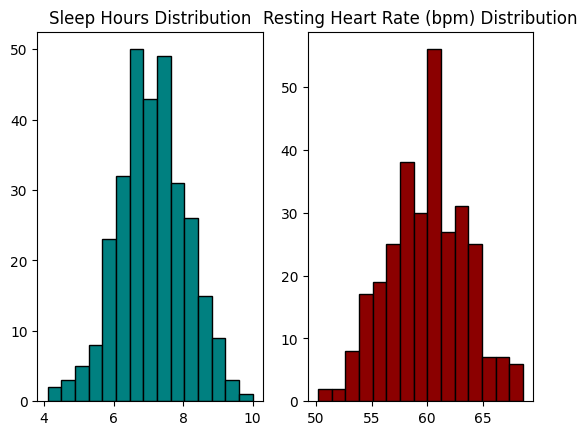

In [65]:
fig, axes =plt.subplots(1,2)

axes[0].hist(df["sleep_hours"], bins = 15, color = "teal", edgecolor = "black")
axes[0].set_title("Sleep Hours Distribution")

axes[1].hist(df["resting_hr"], bins = 15, color = "darkred", edgecolor = "black")
axes[1].set_title("Resting Heart Rate (bpm) Distribution")

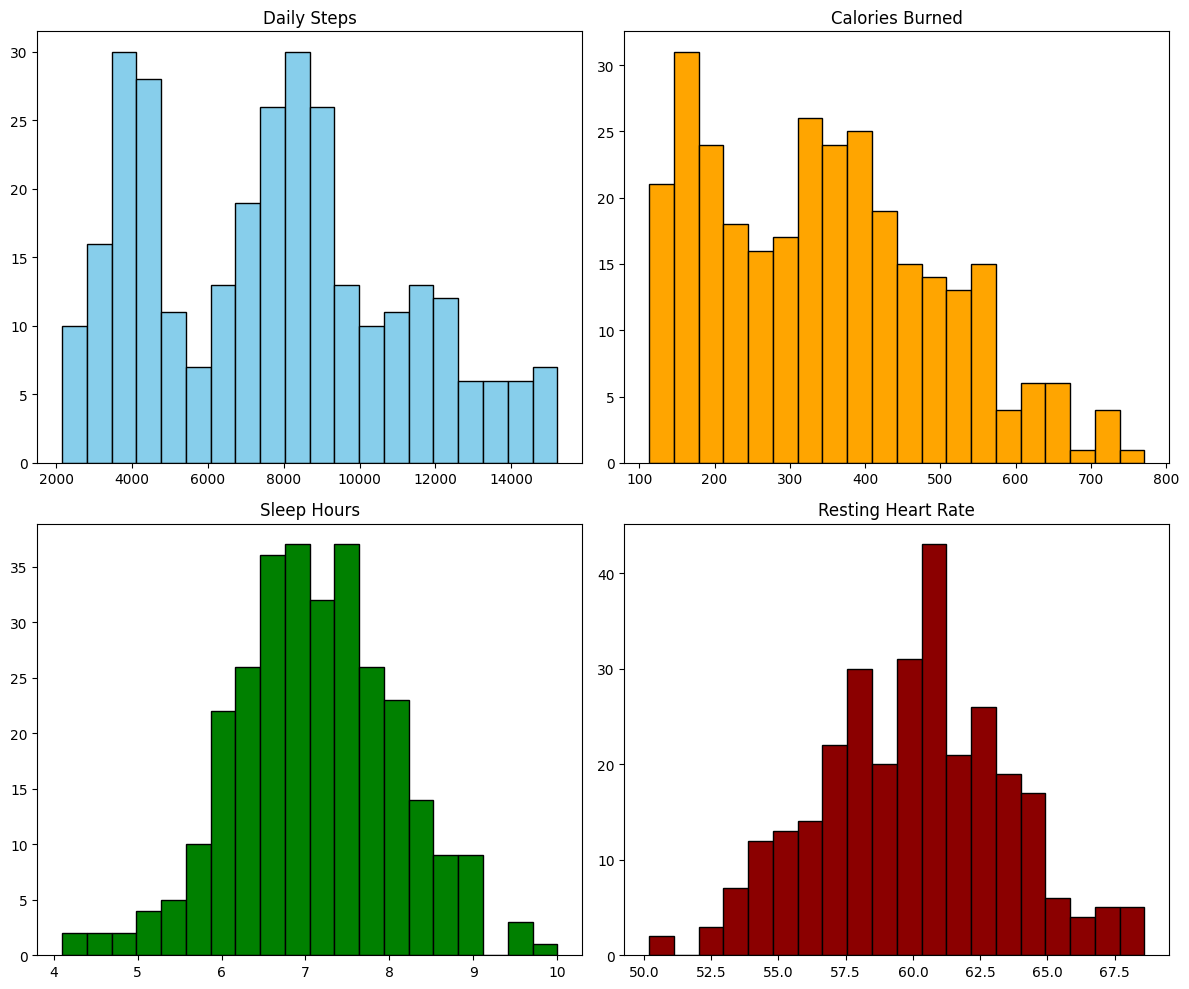

In [70]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

# Histogram 1 (top left) 
axes [0,0].hist(df["steps"], bins = 20, color="skyblue", edgecolor="black")
axes [0,0].set_title("Daily Steps")

# Histogram 2 (top right) 
axes [0,1].hist(df["calories_burned"], bins = 20, color="orange", edgecolor="black")
axes [0,1].set_title("Calories Burned")

# Histogram 3 (bottom left) 
axes [1,0].hist(df["sleep_hours"], bins = 20, color="green", edgecolor="black")
axes [1,0].set_title("Sleep Hours")

# Histogram 4 (bottom right) 
axes [1,1].hist(df["resting_hr"], bins = 20, color="darkred", edgecolor="black")
axes [1,1].set_title("Resting Heart Rate")

plt.tight_layout()
plt.show()

In [71]:
activity_counts = df["activity_level"].value_counts()

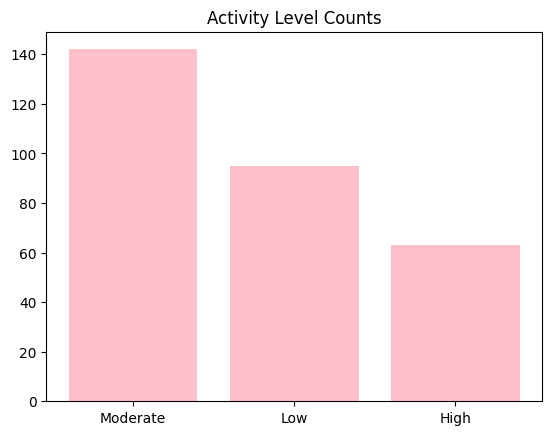

In [ ]:
plt.bar(activity_counts.index, activity_counts.values, color="pink")
plt.title("Activity Level Counts")
plt.show()

In [86]:
high_stress = df[df["stress_score"] > 60]
high_stress.head()



,date,activity_level,steps,calories_burned,sleep_hours,stress_score,resting_hr,day_of_week
7,2024-01-08,High,11679,567,7.7,67,61.6,Monday
11,2024-01-12,High,12574,574,5.7,62,63.8,Friday
23,2024-01-24,Moderate,7506,376,5.2,64,62.5,Wednesday
26,2024-01-27,Low,4355,217,8.3,66,65.4,Saturday
27,2024-01-28,Moderate,7495,325,7.7,63,64.3,Sunday


Text(0.5, 1.0, 'Sleep vs Resting HR -- High Stress Days')

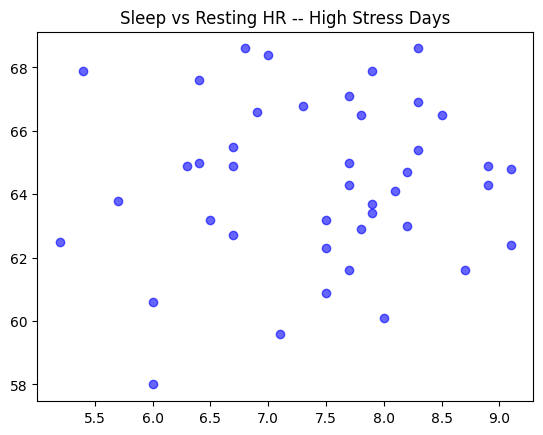

In [87]:
plt.scatter(high_stress["sleep_hours"], high_stress["resting_hr"], color = "blue", alpha=0.6)
plt.title("Sleep vs Resting HR -- High Stress Days")


In [93]:
jan = df[df["date"] < "2024-02-01"]

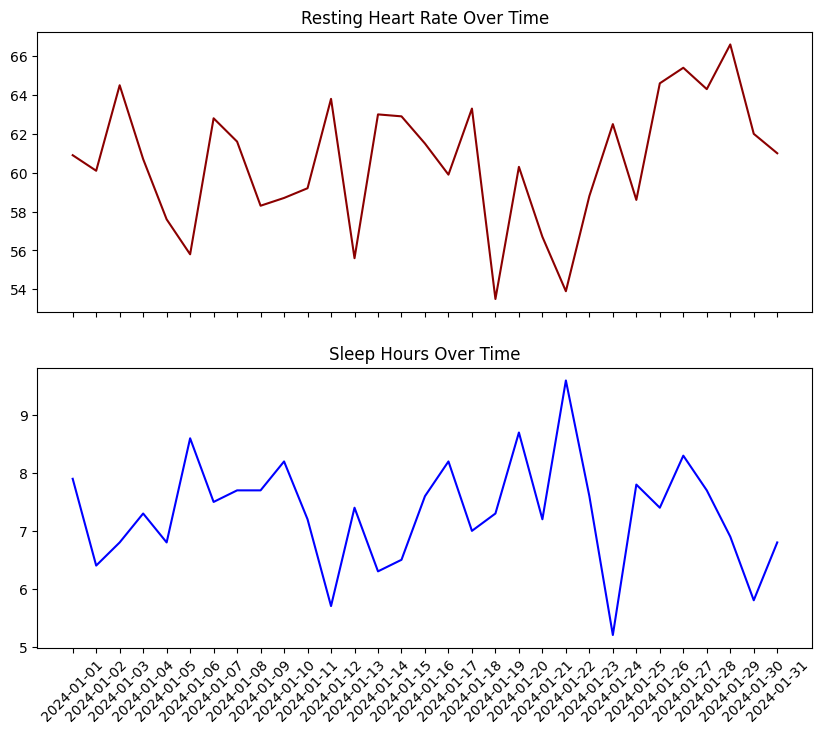

In [94]:
fig, axes = plt.subplots(2,1, figsize=(10,8), sharex=True)

axes[0].plot(jan["date"], jan["resting_hr"], color="darkred")
axes[0].set_title("Resting Heart Rate Over Time")

axes[1].plot(jan["date"], jan["sleep_hours"], color="blue")
axes[1].set_title("Sleep Hours Over Time")

plt.xticks(rotation=45)
plt.show()

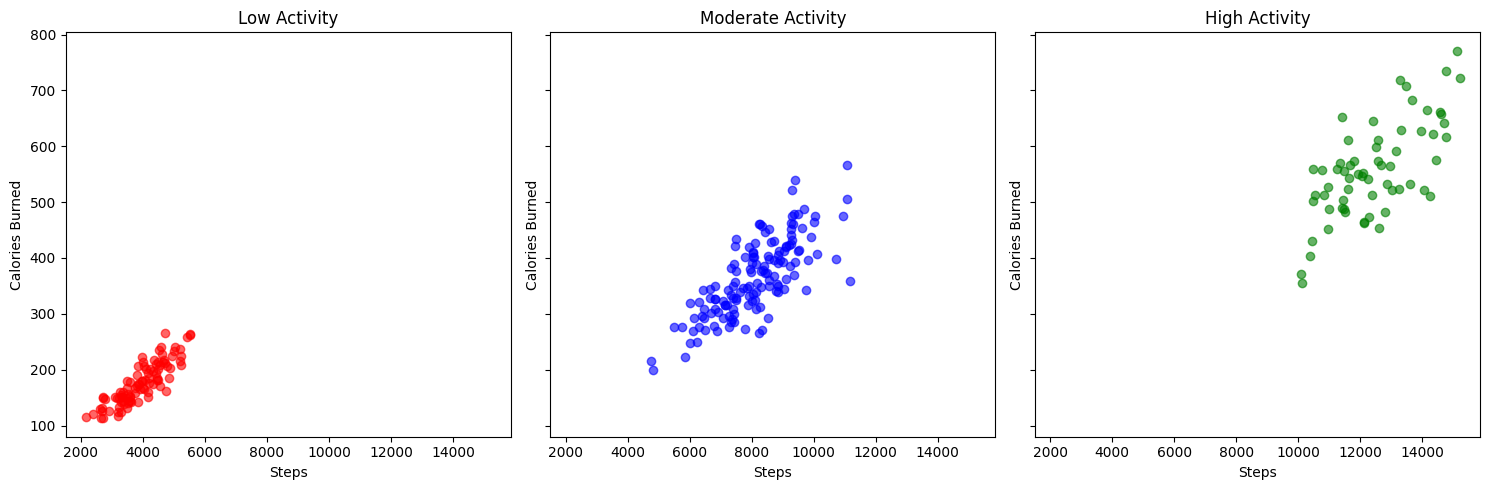

In [99]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

levels = ["Low", "Moderate", "High"]
colors = ["red", "blue", "green"]

for ax, level, color in zip(axes, levels, colors):
    subset = df[df["activity_level"] == level]
    ax.scatter(subset["steps"], subset["calories_burned"], alpha=0.6, color=color)
    ax.set_title(f"{level} Activity")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Calories Burned")

plt.tight_layout()
plt.show()